In [163]:
# Discuss different techniques for handling missing and noisy data in a dataset . how do these techniqus impact the accuracy and reliability of visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data={
    "CustomerID":["1001","1002","1003","1004","1005","1006","1007","1008","1009","1010"],
    "region":["North","South","East","West","North","South","East","West","North","South"],
    "income":[5000,5600,56000,np.nan,5000,np.nan,78000,50450,np.nan,485161],
    "age":[25,12,np.nan,1800,40,np.nan,78,46,70,80],
}
df=pd.DataFrame(data)

print(df.head())

  CustomerID region   income     age
0       1001  North   5000.0    25.0
1       1002  South   5600.0    12.0
2       1003   East  56000.0     NaN
3       1004   West      NaN  1800.0
4       1005  North   5000.0    40.0


In [165]:
#handle missing data
df_drop = df.dropna() # Drop all rows that contain any NaN (missing) values
print("after dropping missing rows:\n",df_drop)

after dropping missing rows:
   CustomerID region    income   age
0       1001  North    5000.0  25.0
1       1002  South    5600.0  12.0
4       1005  North    5000.0  40.0
6       1007   East   78000.0  78.0
7       1008   West   50450.0  46.0
9       1010  South  485161.0  80.0


In [167]:
df_mean = df.copy() # Create a copy of the original DataFrame (so changes don’t affect df)
df_mean["age"].fillna(df["age"].mean(), inplace=True) # Replace missing values in the "age" column with the column's mean value
df_mean["income"].fillna(df["income"].mean(), inplace=True)
# That’s not an error — it’s just a FutureWarning from pandas telling you that the way you’re using inplace=True with chained assignment (df_mean["age"].fillna(..., inplace=True)) may stop working in pandas 3.0.

# The warning is because df_mean["age"] is a view (copy) of the DataFrame, so when you do fillna(..., inplace=True) on that slice, pandas can’t guarantee it will actually modify df_mean.

C:\Users\E-LIBRARY-06\AppData\Local\Temp\ipykernel_19432\726561940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean["age"].fillna(df["age"].mean(), inplace=True)
C:\Users\E-LIBRARY-06\AppData\Local\Temp\ipykernel_19432\726561940.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [169]:
df_mean = df.copy()

df_mean["age"] = df_mean["age"].fillna(df_mean["age"].mean())
df_mean["income"] = df_mean["income"].fillna(df_mean["income"].mean())


In [171]:
df_mean["region"].fillna(df["region"].mode()[0], inplace=True) # Replace missing values in the "region" column with the most frequent value (mode)
print("\nAfter Imputation with Mean/Mode:\n", df_mean)


After Imputation with Mean/Mode:
   CustomerID region         income       age
0       1001  North    5000.000000    25.000
1       1002  South    5600.000000    12.000
2       1003   East   56000.000000   268.875
3       1004   West   97887.285714  1800.000
4       1005  North    5000.000000    40.000
5       1006  South   97887.285714   268.875
6       1007   East   78000.000000    78.000
7       1008   West   50450.000000    46.000
8       1009  North   97887.285714    70.000
9       1010  South  485161.000000    80.000


C:\Users\E-LIBRARY-06\AppData\Local\Temp\ipykernel_19432\1622057451.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean["region"].fillna(df["region"].mode()[0], inplace=True)


In [173]:
df_mean["region"] = df_mean["region"].fillna(df_mean["region"].mode()[0])

print("\nAfter Imputation with Mean/Mode:\n", df_mean)



After Imputation with Mean/Mode:
   CustomerID region         income       age
0       1001  North    5000.000000    25.000
1       1002  South    5600.000000    12.000
2       1003   East   56000.000000   268.875
3       1004   West   97887.285714  1800.000
4       1005  North    5000.000000    40.000
5       1006  South   97887.285714   268.875
6       1007   East   78000.000000    78.000
7       1008   West   50450.000000    46.000
8       1009  North   97887.285714    70.000
9       1010  South  485161.000000    80.000


In [175]:
#handling noisy data
# Add some noisy outlier values
df_noisy = df_mean.copy()
df_noisy.loc[2,"income"]=999999 # extremme outier # Introduce an extreme outlier in the "income" column at row index 2
print("\n with noise outlier \n",df_noisy)

# 1. Binning - Group "age" into categories (discretization)
df_noisy["age_bin"]=pd.cut(df_noisy["age"],bins=[20,30,40,50],labels=["20-30","30-40","40-50"]) # bin ranges # labels for bins
)
print("\n after binning",df_noisy[["age","age_bin"]])

# 2.Smoothing - Apply rolling mean to smooth "income" column
df_noisy["income_smoothed"]=df_noisy["income"].rolling(window=2, # size of moving window (2 values at a time)
                                                       min_periods=1).mean()  # allow smoothing even if only 1 value available
print("\nafter rolling mean smoothing\n",df_noisy[["income","income_smoothed"]])


 with noise outlier 
   CustomerID region         income       age
0       1001  North    5000.000000    25.000
1       1002  South    5600.000000    12.000
2       1003   East  999999.000000   268.875
3       1004   West   97887.285714  1800.000
4       1005  North    5000.000000    40.000
5       1006  South   97887.285714   268.875
6       1007   East   78000.000000    78.000
7       1008   West   50450.000000    46.000
8       1009  North   97887.285714    70.000
9       1010  South  485161.000000    80.000

 after binning         age age_bin
0    25.000   20-30
1    12.000     NaN
2   268.875     NaN
3  1800.000     NaN
4    40.000   30-40
5   268.875     NaN
6    78.000     NaN
7    46.000   40-50
8    70.000     NaN
9    80.000     NaN

after rolling mean smoothing
           income  income_smoothed
0    5000.000000      5000.000000
1    5600.000000      5300.000000
2  999999.000000    502799.500000
3   97887.285714    548943.142857
4    5000.000000     51443.642857
5   97887.2

Original Dataset:
   Experience    Salary
0         1.0   30000.0
1         2.0   40000.0
2         3.0   50000.0
3         4.0       NaN
4         5.0   70000.0
5         NaN  800000.0
6         7.0   90000.0
7         8.0  100000.0
8         9.0       NaN
9        10.0  130000.0


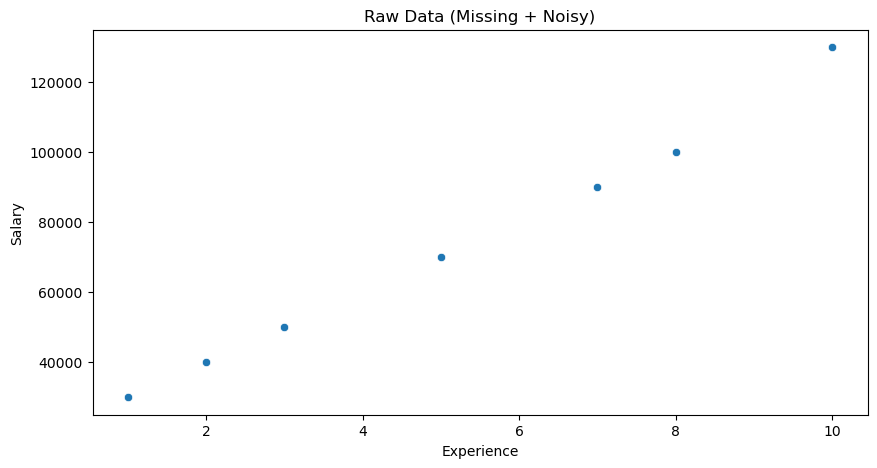

95th Percentile Upper Cap for Salary: 513687.4999999993


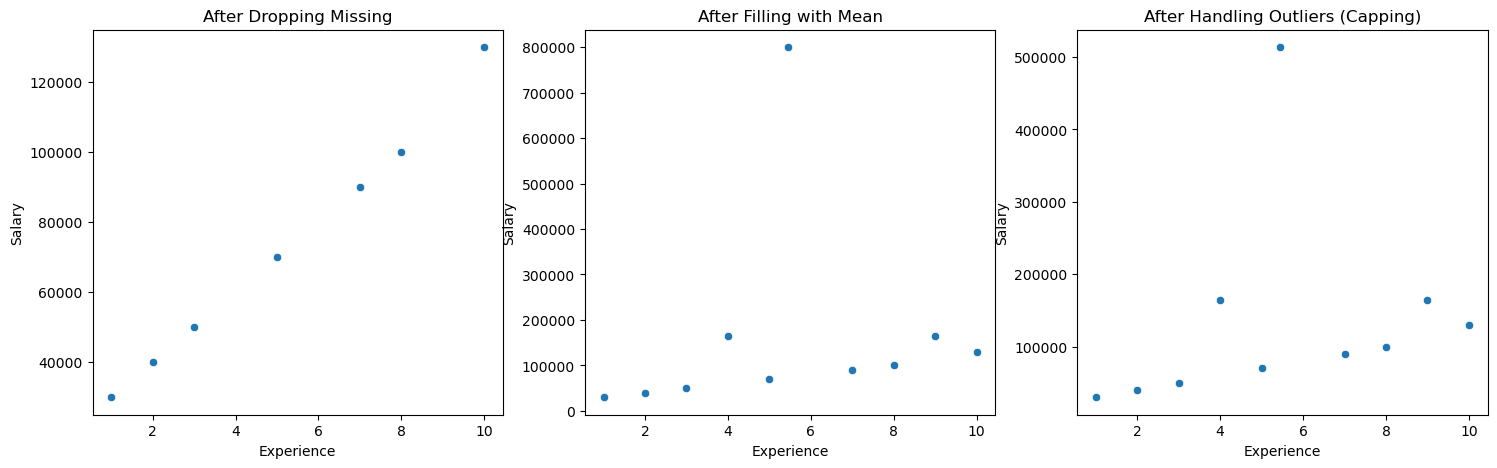

In [177]:
#alternate way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create dataset with missing & noisy values
data = {
    "Experience": [1, 2, 3, 4, 5, np.nan, 7, 8, 9, 10],
    "Salary": [30000, 40000, 50000, None, 70000, 800000, 90000, 100000, None, 130000] 
    # Missing values: NaN, None
    # Noisy data: Extreme outlier (800000 in Salary)
}

df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

# Step 2: Raw Visualization (Before Cleaning)
plt.figure(figsize=(10,5))
sns.scatterplot(x="Experience", y="Salary", data=df)
plt.title("Raw Data (Missing + Noisy)")
plt.show()

# Step 3: Handle Missing Values
# Option 1: Drop missing rows (simple but may lose data)
df_dropna = df.dropna()

# Option 2: Fill missing values with mean (better, keeps data)
df_fill = df.copy()
df_fill["Experience"] = df_fill["Experience"].fillna(df_fill["Experience"].mean())
df_fill["Salary"] = df_fill["Salary"].fillna(df_fill["Salary"].mean())

# Step 4: Handle Noisy Data (Outliers)
df_cap = df_fill.copy()
upper_limit = df_cap["Salary"].quantile(0.95)  # Calculate 95th percentile as upper cap for Salary
df_cap["Salary"] = np.where(df_cap["Salary"] > upper_limit, upper_limit, df_cap["Salary"]) # Replace values above upper_limit with the cap (winsorization)

print("95th Percentile Upper Cap for Salary:", upper_limit)

# Step 5: Visual Comparisons
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# After dropping missing values
sns.scatterplot(ax=axes[0], x="Experience", y="Salary", data=df_dropna)
axes[0].set_title("After Dropping Missing")

# After filling missing values with mean
sns.scatterplot(ax=axes[1], x="Experience", y="Salary", data=df_fill)
axes[1].set_title("After Filling with Mean")

# After capping outliers
sns.scatterplot(ax=axes[2], x="Experience", y="Salary", data=df_cap)
axes[2].set_title("After Handling Outliers (Capping)")

# Common axis labels
for ax in axes:
    ax.set_xlabel("Experience")
    ax.set_ylabel("Salary")

plt.show()
